# **The Sparks Foundation** <br> (GRIPMARCH23)
## "Data Science & Business Analytics"<br>
## Task-1 : Prediction using Supervised ML <br>
#### Perform a simple linear regression analysis for Predict the percentage of an student based on the no. of study hours <br>
## **Aurthor** : *Yati Maheshwari*

## Importing the relevant libraries

In [42]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn import metrics

#### we can load our dataset, which should include two columns: one for the number of hours read, and one for the student's score.

In [43]:
#Loading Dataset
data = pd.read_csv('http://bit.ly/w-data')
data.style.background_gradient(cmap='RdPu')

,Hours,Scores
0,2.500000,21
1,5.100000,47
2,3.200000,27
3,8.500000,75
4,3.500000,30
5,1.500000,20
6,9.200000,88
7,5.500000,60
8,8.300000,81
9,2.700000,25


## Preprocessing <br>
### Exploring the descriptive statistics of the variables

In [44]:
#Statistical Analysis
data.describe(include = 'all').style.background_gradient(cmap='Blues')

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Dealing with missing values

In [45]:
#Checking null data
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

 There is no null value.

### Checking Outliers 

c:\Users\rdroi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Scores'>

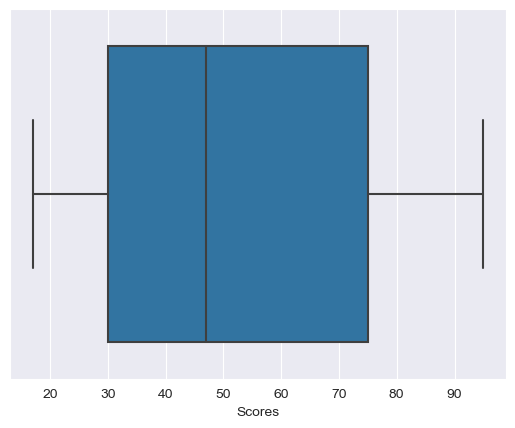

In [46]:
sns.boxplot(data['Scores'])

Clearly there is no Outliers

## Data Visualisation<br>
### Heat Map<br>
#### that defines how much they are correlated

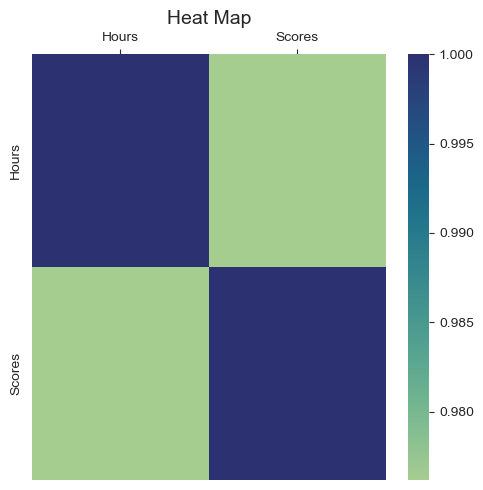

In [47]:
corrmat = data.corr()
top_corr_features = corrmat.index                    
plt.figure(figsize = (5,5))
plt.title('Heat Map', fontsize=14)
g = sns.heatmap(data[corrmat.index].corr(), cmap="crest")
g.xaxis.tick_top()
plt.tight_layout()

### Correlation Matrix

In [48]:
#correlation coffiecient (.98) define both variable are positively highly correlated 
pd.set_option('display.precision', 2)
data.corr()

,Hours,Scores
Hours,1.00,0.98
Scores,0.98,1.00


### Scatter Plot

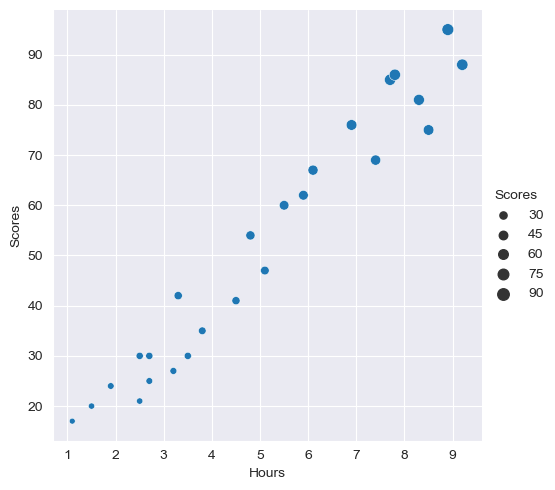

In [49]:
sns.relplot(x='Hours', y='Scores', data=data,kind='scatter',size='Scores');
sns.set_style('darkgrid')

### Declare the inputs and the targets

In [50]:
# Input
X = data['Hours']
# Target
Y = data['Scores']

It is useful to check the shapes of the features

In [51]:
X.shape

(25,)

In order to feed x to sklearn, it should be a 2D array (a matrix)<br>
We must reshape it

In [52]:
x_matrix = X.values.reshape(-1,1)
y_matrix = Y.values.reshape(-1,1)
x_matrix.shape

(25, 1)

## Train Test Split
Split the variables with an 80-20 split and some random state

In [53]:
X_train, X_test, y_train, y_test = train_test_split(x_matrix, y_matrix, test_size=0.2, random_state= 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(20, 1) (5, 1) (20, 1) (5, 1)


## Create the Linear Regression Model and training the data

In [54]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

### R-squared

In [55]:
reg.score(X_train,y_train)

0.9491209376364416

### Predict the regression line
line = reg.coef_*X+reg.intercept_


### Finding the weights and bias

In [56]:
# Obtain the weights (coefficients) of the regression
reg.coef_

array([[9.68207815]])

In [57]:
# Obtain the bias (intercept) of the regression
reg.intercept_

array([2.82689235])

## Testing & make prediction

In [58]:
#Let's check the outputs of the regression
# I'll store them in y_hat_test as this is the 'theoretical' name of the predictions
y_hat_test = reg.predict(X_test)
y_hat_test

array([[83.18814104],
       [27.03208774],
       [27.03208774],
       [69.63323162],
       [59.95115347]])

# Plotting the regression line

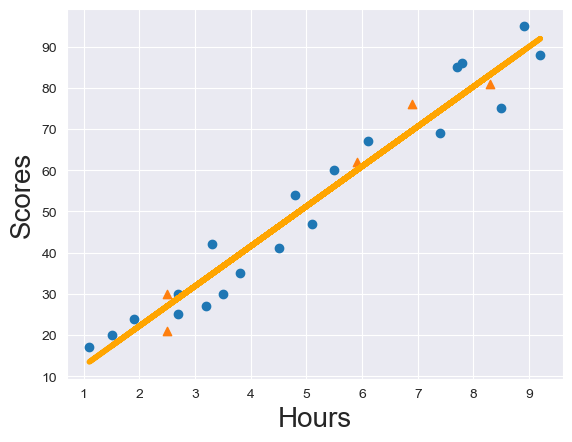

In [59]:
plt.scatter(X_train,y_train ,marker='o')
plt.scatter(X_test,y_test,marker = '^' )
# Parametrized version of the regression line
y_hat = reg.coef_*x_matrix + reg.intercept_
# Non-parametrized version of the regression line
#y_hat = 9.68207815 *X + 2.82689235
# Plotting the regression line
fig = plt.plot(X,y_hat, lw=4, c='orange', label ='regression line')
plt.xlabel('Hours', fontsize = 20)
plt.ylabel('Scores', fontsize = 20)
plt.show()

## Model Evaluation

### for evaluation we need data in 1D 

In [60]:
y_test
y_test_temp = y_test.transpose()[0]
y_hat_test
y_hat_test_temp = y_hat_test.transpose()[0]
list(y_hat_test_temp)
y_hat_test_temp.shape

(5,)

In [61]:
# Finally, let's manually check these predictions
df = pd.DataFrame({'Actual Score': y_test_temp, 'Predicted Scores' : y_hat_test_temp })
df['diff'] = df['Actual Score'] - df['Predicted Scores']
df

,Actual Score,Predicted Scores,diff
0,81,83.19,-2.19
1,30,27.03,2.97
2,21,27.03,-6.03
3,76,69.63,6.37
4,62,59.95,2.05


In [62]:
metrics.mean_absolute_error(y_test,y_hat_test)

3.9207511902099244

In [63]:
y_hat = 9.68207815 * x_matrix + 2.82689235

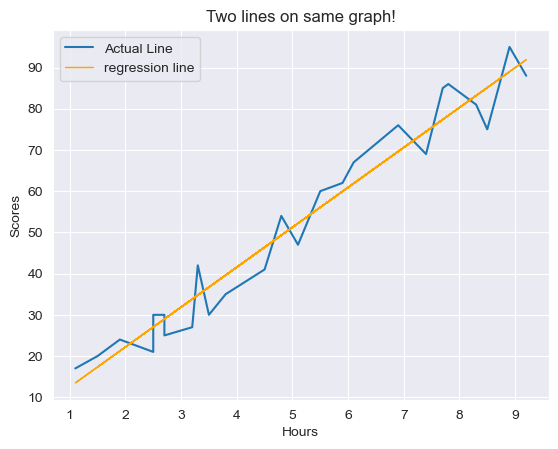

In [64]:
# Sort data for showing Actual Line and Predicted Line
df = data.sort_values('Hours')
plt.plot(df['Hours'], df['Scores'], label = "Actual Line")
fig = plt.plot(X,y_hat, lw=1, c='orange', label ='regression line')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title("Two lines on same graph!")
plt.legend()
plt.show()

## What will be predicted score if a student studies for 9.25 hrs/ day?

In [65]:
pre_score = reg.predict([[9.25 ]])
pre_score

array([[92.38611528]])